In [1]:
import pickle
from random import shuffle

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import classification_report, f1_score

from src.parsers import NewsgroupsParser, ReutersParser
from src.engines.doc2vec import Doc2VecModel

In [3]:
NEWSGROUPS = NewsgroupsParser()
doc2vec = Doc2VecModel(dataset=NEWSGROUPS, use_predictor=False)

FileNotFoundError: [Errno 2] No such file or directory: '20newsgroups-18828(Doc2Vec Model).model.wv.vectors.npy'

In [ ]:
shuffle(NEWSGROUPS.entries)
entries = NEWSGROUPS.entries[:2000]
labels = list(set([entry.group for entry in entries]))
label_index = {}
labels_size = 0
for label in labels:
    label_index[label] = labels_size
    labels_size += 1

X = np.array([doc2vec.model.dv[entry.id] for entry in entries])
y = np.array([label_index[entry.group] for entry in entries])

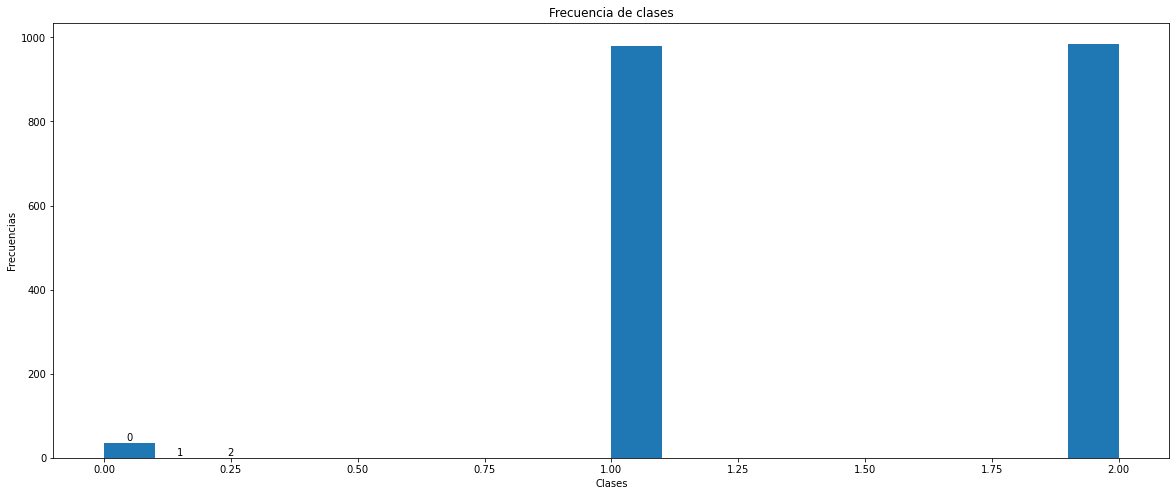

In [205]:
fig, ax = plt.subplots(1, 1)

ax.set_title('Frecuencia de clases')
ax.set_ylabel('Frecuencias')
ax.set_xlabel('Clases')

fig.set_figheight(8)
fig.set_figwidth(20)

ax.hist(y, bins=20)

rects = ax.patches
for i, (rect, label) in enumerate(zip(rects, labels)):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, f"{i}", ha='center', va='bottom')

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [207]:
clf = SVC(C=4, kernel='poly', degree=3)
clf.fit(X_train, y_train)

SVC(C=4, kernel='poly')

In [208]:
y_pred = clf.predict(X_test)

In [209]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.88      0.79      0.84       184
           2       0.82      0.91      0.86       210

    accuracy                           0.84       400
   macro avg       0.57      0.57      0.57       400
weighted avg       0.84      0.84      0.84       400



/home/samueldsr/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/samueldsr/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/samueldsr/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<module 'matplotlib.pyplot' from '/home/samueldsr/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

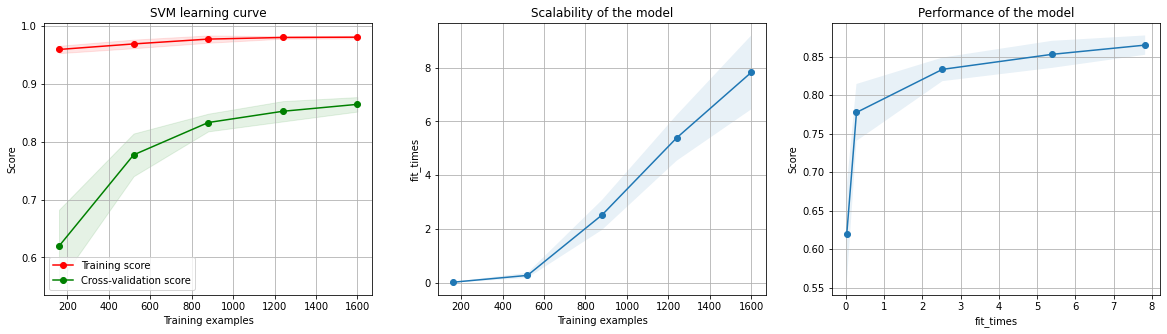

In [210]:
from plot_learning_curves import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

estimator = SVC(C=4, kernel='poly', degree=3)

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
title = "SVM learning curve"
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=16)